# Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from mpl_toolkits.basemap import Basemap
import folium
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline
sns.set_color_codes("pastel")

In [2]:
cancel_reason = ['Carrier','Weather','NAS','Security']

In [3]:
#Import all data
flights_df = pd.read_csv('2008.csv')
airports_df = pd.read_csv('airports.csv')
carriers_df = pd.read_csv('carriers.csv')

#Change case of column names
flights_df.columns = [column.lower() for column in flights_df.columns]

#Backup main data
df = flights_df.copy()

In [4]:
df.head(3)

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime',
       'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum',
       'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

# Data Statistics

In [5]:
df.shape

(7009728, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [8]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [11]:
df.nunique()

Year                    1
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1440
CRSDepTime           1217
ArrTime              1440
CRSArrTime           1378
UniqueCarrier          20
FlightNum            7539
TailNum              5373
ActualElapsedTime     689
CRSElapsedTime        525
AirTime               663
ArrDelay             1153
DepDelay             1134
Origin                303
Dest                  304
Distance             1435
TaxiIn                190
TaxiOut               342
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          984
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

## Null Values

In [35]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [53]:
#Confirm that missing time data (arrival/departure) is due to cancelled/diverted planes
df[(df.Cancelled==False) & (df.Diverted==False)].isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6855029
Diverted                   0
CarrierDelay         5330294
WeatherDelay         5330294
NASDelay             5330294
SecurityDelay        5330294
LateAircraftDelay    5330294
dtype: int64

## Issues to fix

<ul>
  <li>Change type of columns expressed in hours/minutes time object</li>
  <li>Change type of columns expressed in minutes to int</li>
  <li>Replace NaN values for time columns with 0</li>
  <li>Change type of cancelled,diverted columns to boolean</li>
  <li>Change cancellation code, unique carrier to categorical</li>
  <li>Drop Taxi Time related data</li>  
</ul>

# Data Wrangling 

## Drop unused data

### Fix

In [4]:
drop_columns = ['taxiin','taxiout','year','diverted','tailnum','actualelapsedtime','crselapsedtime']
df.drop(columns=drop_columns,inplace=True)

### Test

In [7]:
df.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'uniquecarrier', 'flightnum', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'cancelled',
       'cancellationcode', 'carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay'],
      dtype='object')

## Categorical variables

### Fix

In [5]:
df[['cancellationcode','uniquecarrier']] = df[['cancellationcode','uniquecarrier']].astype('category')

### Test

In [14]:
df.CancellationCode.unique()

[NaN, A, C, B, D]
Categories (4, object): [A, C, B, D]

In [14]:
df.uniquecarrier.unique()

[WN, XE, YV, OH, OO, ..., AA, AQ, AS, B6, CO]
Length: 20
Categories (20, object): [WN, XE, YV, OH, ..., AQ, AS, B6, CO]

## Boolean variables

### Fix

In [6]:
df[['cancelled']] = df[['cancelled']].astype('bool')

### Test

In [21]:
df.Cancelled.dtype

dtype('bool')

## Null Values

### Fix

In [7]:
time_columns = df.columns[(df.columns.str.contains('time'))|(df.columns.str.contains('delay'))]
print(time_columns)
df[time_columns] = df[time_columns].fillna(0)

Index(['deptime', 'crsdeptime', 'arrtime', 'crsarrtime', 'airtime', 'arrdelay',
       'depdelay', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay'],
      dtype='object')


### Test

In [65]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

## Time variables

### Fix

In [8]:
#Make all columns integers
df[time_columns] = df[time_columns].astype(int)

In [9]:
#select the columns in HH:MM format
time_columns = time_columns[:4]
time_columns 

Index(['deptime', 'crsdeptime', 'arrtime', 'crsarrtime'], dtype='object')

In [10]:
#In order to convert column to type ensure all hours are between 0 and 23 and all minutes are between 0 and 59
#Do this for all columns
for column in time_columns:
    print(df[df[column] > 2359][column].unique())
    print(df[df[column] % 100 > 59][column].unique())

[2400]
[]
[]
[]
[2400]
[]
[2400]
[]


In [11]:
#Replace the values and convert
for column in time_columns:
    df[column].replace(2400,0,inplace=True)
    df[column] = df[column].apply(lambda x: datetime.time(int(x/100), x%100))

### Test

In [12]:
df[time_columns].dtypes

deptime       object
crsdeptime    object
arrtime       object
crsarrtime    object
dtype: object

In [13]:
df[time_columns].head(10)

,deptime,crsdeptime,arrtime,crsarrtime
0,20:03:00,19:55:00,22:11:00,22:25:00
1,07:54:00,07:35:00,10:02:00,10:00:00
2,06:28:00,06:20:00,08:04:00,07:50:00
3,09:26:00,09:30:00,10:54:00,11:00:00
4,18:29:00,17:55:00,19:59:00,19:25:00
5,19:40:00,19:15:00,21:21:00,21:10:00
6,19:37:00,18:30:00,20:37:00,19:40:00
7,10:39:00,10:40:00,11:32:00,11:50:00
8,06:17:00,06:15:00,06:52:00,06:50:00
9,16:20:00,16:20:00,16:39:00,16:55:00


In [13]:
flights_df = df.copy()
#df.to_csv('flights_clean.csv')

In [126]:
carriers_df[carriers_df.Code=='US']

,Code,Description
1308,US,US Airways


In [119]:
carriers_df.at[1308,'Description'] = 'US Airways'

In [120]:
carriers_df.head(3)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"


In [127]:
#Convert the carrier mapping into a dictionary
carrier_dict = dict(zip(carriers_df.Code,carriers_df.Description))

In [125]:
carrier_dict

{'02Q': 'Titan Airways',
 '04Q': 'Tradewind Aviation',
 '05Q': 'Comlux Aviation, AG',
 '06Q': 'Master Top Linhas Aereas Ltd.',
 '07Q': 'Flair Airlines Ltd.',
 '09Q': 'Swift Air, LLC',
 '0BQ': 'DCA',
 '0CQ': 'ACM AIR CHARTER GmbH',
 '0FQ': 'Maine Aviation Aircraft Charter, LLC',
 '0GQ': 'Inter Island Airways, d/b/a Inter Island Air',
 '0HQ': 'Polar Airlines de Mexico d/b/a Nova Air',
 '0J': 'JetClub AG',
 '0JQ': 'Vision Airlines',
 '0KQ': 'Mokulele Flight Services, Inc.',
 '0LQ': 'Metropix UK, LLP.',
 '0MQ': 'Multi-Aero, Inc. d/b/a Air Choice One',
 '0Q': 'Flying Service N.V.',
 '16': 'PSA Airlines Inc.',
 '17': 'Piedmont Airlines',
 '1I': "Sky Trek Int'l Airlines",
 '2E': 'Smokey Bay Air Inc.',
 '2F': 'Frontier Flying Service',
 '2M': 'Midway Express Airlines',
 '2O': 'Island Air Service',
 '2R': 'Regal Air',
 '2T': 'Canada 3000 Airlines Ltd.',
 '2U': 'Valley Air Express Inc.',
 '37': 'Zeal 320',
 '3C': 'Regions Air, Inc.',
 '3F': 'Pacific Airways, Inc.',
 '3M': 'Gulfstream Int',
 '3Z'

# Exploratory Analysis

In [15]:
df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,...,TPA,810,False,NaN,False,0,0,0,0,0
1,2008,1,3,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,...,TPA,810,False,NaN,False,0,0,0,0,0
2,2008,1,3,4,06:28:00,06:20:00,08:04:00,07:50:00,WN,448,...,BWI,515,False,NaN,False,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 27 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        category
FlightNum            int64
TailNum              object
ActualElapsedTime    int32
CRSElapsedTime       int32
AirTime              int32
ArrDelay             int32
DepDelay             int32
Origin               object
Dest                 object
Distance             int64
Cancelled            bool
CancellationCode     category
Diverted             bool
CarrierDelay         int32
WeatherDelay         int32
NASDelay             int32
SecurityDelay        int32
LateAircraftDelay    int32
dtypes: bool(2), category(2), int32(10), int64(6), object(7)
memory usage: 989.4+ MB


In [18]:
df.Origin.nunique()

303

In [19]:
df.Dest.nunique()

304

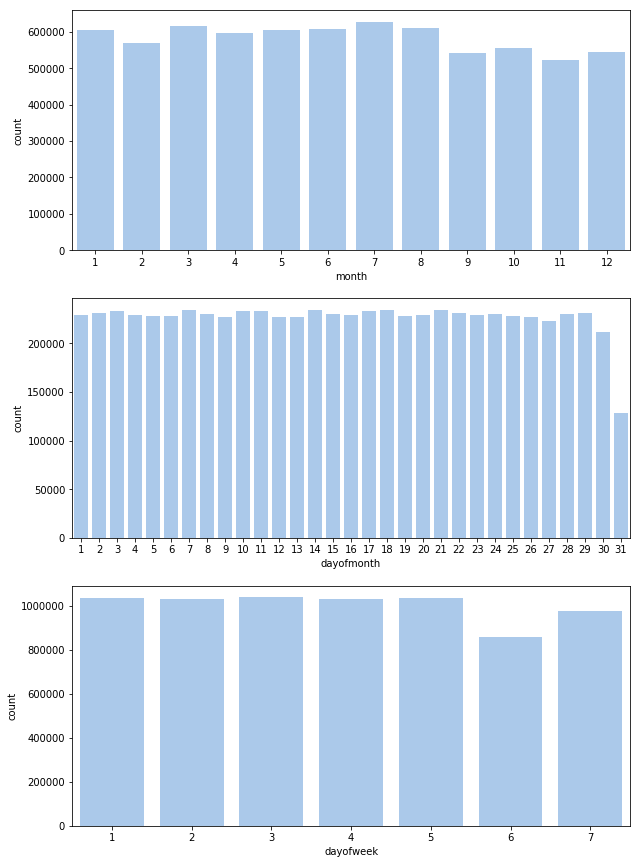

In [12]:
#Check distribution of flights per Day of week/month and month
#Expectation is that the values are aproximately close (with the exception of the 31st day of the month)
#Any major deviation will be investigated
variables = ['month','dayofmonth','dayofweek']
fig,axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10,15))
for variable,ax in zip(variables,axes):
    sns.countplot(data = df, x = variable,color = 'b', ax = ax);

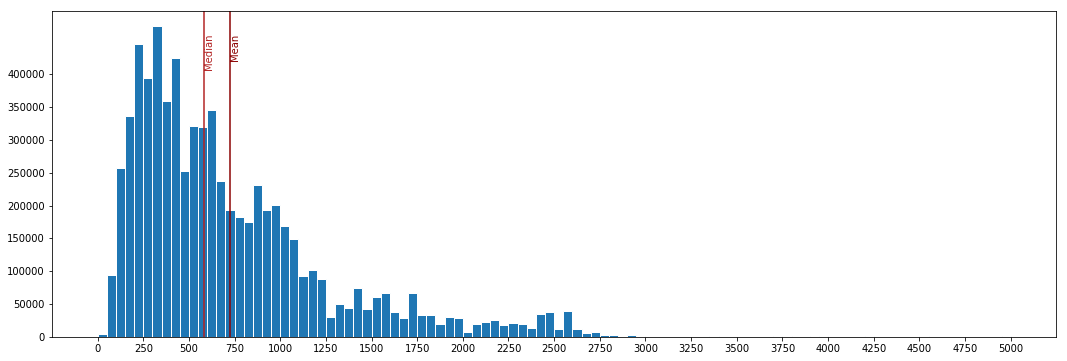

In [13]:
bin_size = 50
bins = np.arange(0,df.distance.max()+bin_size,bin_size)
fig,ax = plt.subplots(figsize=(18,6))
plt.xticks(bins[::5])
plt.yticks(np.arange(0,450000,50000))
plt.axvline(x=df.distance.median(),color = '#B22222')
plt.text(df.distance.median(),450000,'Median',rotation='vertical',color='#B22222')
plt.axvline(x=df.distance.mean(),color = '#8B0000')
plt.text(df.distance.mean(),450000,'Mean',rotation='vertical',color='#8B0000')
plt.hist(data=df, x = 'distance',bins = bins,edgecolor = 'w');

In [22]:
df.distance.describe()[-5:]

min      11.0
25%     325.0
50%     581.0
75%     954.0
max    4962.0
Name: distance, dtype: float64

In [23]:
df[df.distance < 100][['origin','dest']]

,origin,dest
94778,SAN,ONT
96148,SAT,AUS
97290,ONT,SAN
97321,ONT,SAN
102740,BPT,IAH
102861,DTW,CLE
102980,DTW,CLE
103018,IAH,BPT
103417,IAH,BPT
103441,BPT,IAH


## Cancellations

In [4]:
df = pd.read_csv('flights_clean.csv')

In [110]:
dfcancel = flights_df.copy()
#dfcancel = dfcancel.drop(columns=['arrtime','crsarrtime','airtime', 'arrdelay',
#       'depdelay','carrierdelay', 'weatherdelay', 'nasdelay',
#       'securitydelay', 'lateaircraftdelay'])
dfcancel.head(3)

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


- cancellation per carrier and reason
- cancellation and distance
- cancellation and origin/weather
- cancellation per timeintervals

### Carriers with the highest percentage of cancellations

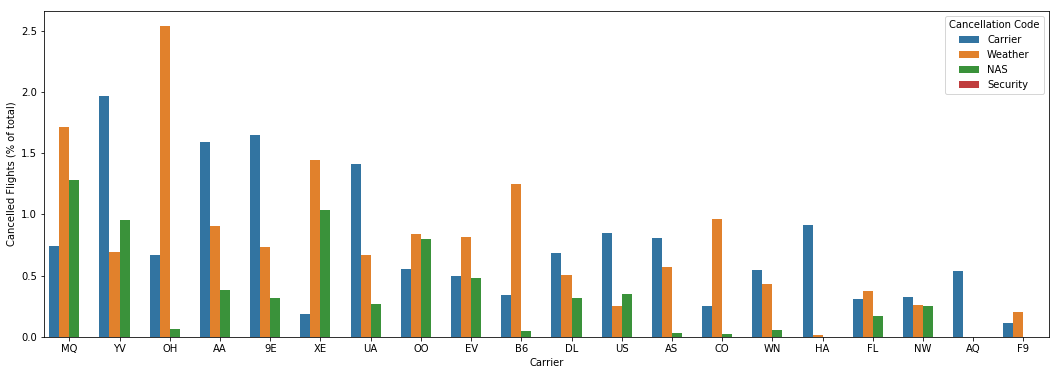

In [112]:
#Get number of cancelled flights per carrier
carr_cancel = dfcancel.groupby(['uniquecarrier','cancellationcode']).cancelled.sum().reset_index()

#Get number of flights per carrier
carr_flights = dfcancel.groupby('uniquecarrier').flightnum.count().reset_index()

#Left join the results to compute the cancellation rates
df_cancel = pd.merge(carr_cancel,carr_flights,on='uniquecarrier',how = 'left')
df_cancel['cancelrate'] = df_cancel.cancelled / df_cancel.flightnum * 100

#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel.groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelrate', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights (% of total)')
plt.xlabel('Carrier');

### Carriers with highest rate of cancellation due their own fault

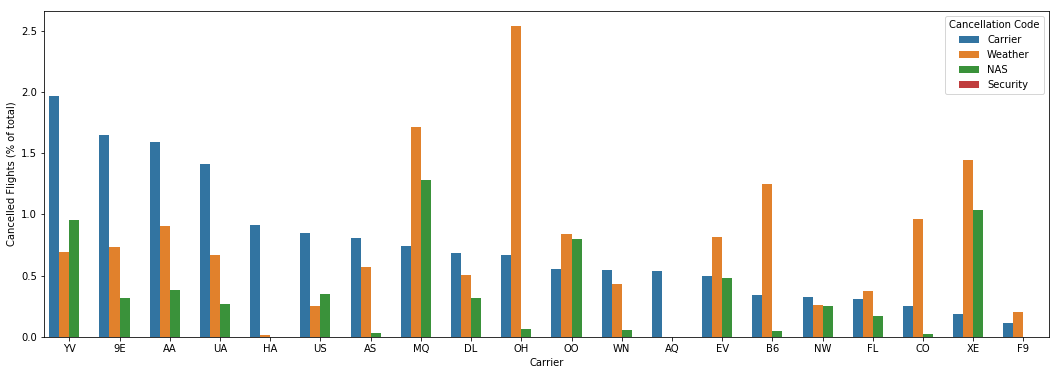

In [17]:
#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelrate', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights (% of total)')
plt.xlabel('Carrier');

### Carriers with highest number of cancellation due their own fault

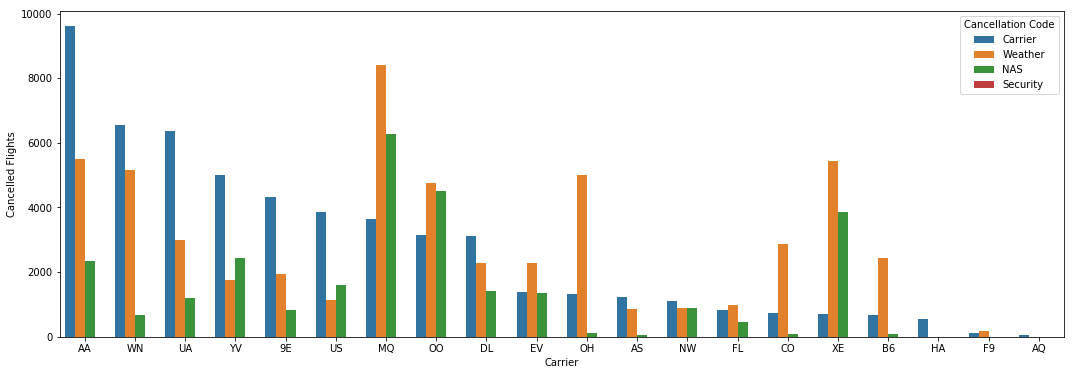

In [18]:
#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelled.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelled', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights')
plt.xlabel('Carrier');

### Distance correlation

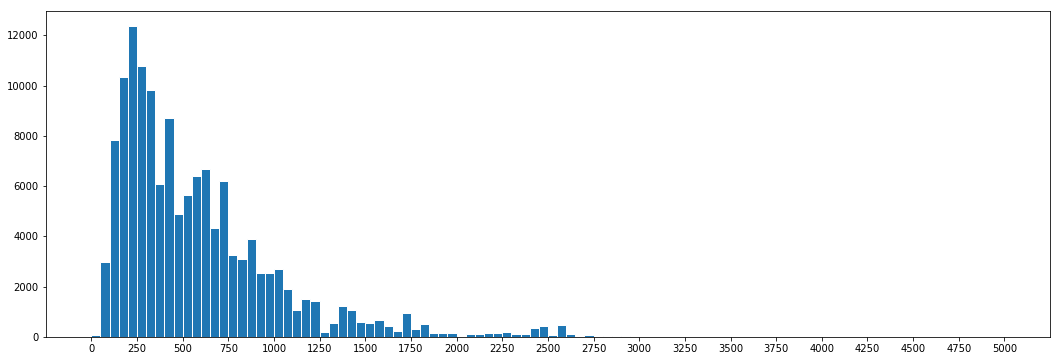

In [42]:
bin_size = 50
bins = np.arange(0,dfcancel.distance.max()+bin_size,bin_size)
fig,axes = plt.subplots(figsize=(18,6))
plt.xticks(bins[::5])
plt.hist(data=dfcancel[dfcancel.cancelled], x = 'distance',bins = bins,edgecolor = 'w');

In [43]:
dfcancel['distance_bin'] = pd.cut(dfcancel.distance,bins)

In [44]:
total_flights = dfcancel.groupby('distance_bin').flightnum.count().values
cancelled_flights = dfcancel[dfcancel.cancelled].groupby('distance_bin').flightnum.count().values

<BarContainer object of 100 artists>

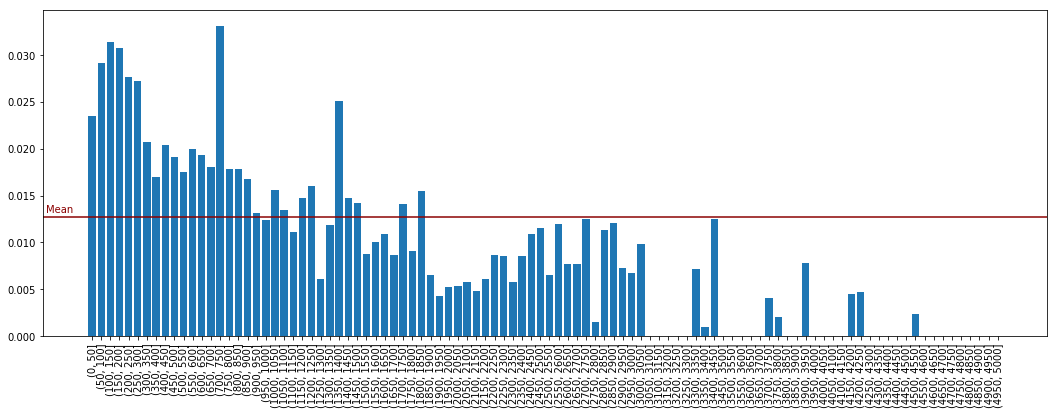

In [58]:
cancel_ratios = []
for i,j in zip(total_flights,cancelled_flights):
    if i==0:
        cancel_ratios.append(0)
    else:
        cancel_ratios.append(j/i)

fig,axes = plt.subplots(figsize=(18,6))
plt.xticks(rotation='vertical')
plt.axhline(y=np.average([n for n in cancel_ratios if n>0]),color = '#8B0000')
plt.text(-5,np.average([n for n in cancel_ratios if n>0])+0.0005,'Mean',rotation='horizontal',color='#8B0000')
plt.bar([str(x) for x in dfcancel.groupby('distance_bin').flightnum.count().index],cancel_ratios)

### Airports with the highest rate of cancellations

In [68]:
df_cancel_origin = pd.concat(
    [df[df.cancellationcode == 'B'].groupby(['origin']).origin.count(),
     df.groupby(['origin']).origin.count()],
    axis = 1, sort = True)
df_cancel_origin.columns = ['cancellations','total']
df_cancel_origin.cancellations.fillna(0)
df_cancel_origin['cancelrate'] = df_cancel_origin.cancellations / df_cancel_origin.total * 100
df_cancel_origin.sort_values(by='cancellations',ascending=False,inplace=True)
df_cancel_origin.reset_index(inplace=True)
df_cancel_origin.rename(index=str, columns={'index':'iata'},inplace=True)
df_cancel_origin = pd.merge(df_cancel_origin,airports_df,on='iata',how='left')
df_cancel_origin.head(20)

,iata,cancellations,total,cancelrate,airport,city,state,country,lat,long
0,ORD,4896.0,350380,1.397340,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
1,DFW,3462.0,281281,1.230798,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200
2,IAH,2605.0,185172,1.406800,George Bush Intercontinental,Houston,TX,USA,29.980472,-95.339722
3,ATL,2498.0,414513,0.602635,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
4,JFK,2051.0,118804,1.726373,John F Kennedy Intl,New York,NY,USA,40.639751,-73.778926
5,LGA,1833.0,119135,1.538591,LaGuardia,New York,NY,USA,40.777243,-73.872609
6,EWR,1663.0,138506,1.200670,Newark Intl,Newark,NJ,USA,40.692497,-74.168661
7,BOS,1353.0,117915,1.147437,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
8,DEN,1098.0,241443,0.454766,Denver Intl,Denver,CO,USA,39.858408,-104.667002
9,HOU,984.0,55933,1.759248,William P Hobby,Houston,TX,USA,29.645419,-95.278889


In [69]:
@interact_manual

def show_map (Selected_Airports = (5,df_cancel_origin.iata.nunique(),5),
             Aggregation_Criteria = ['Number_of_Cancellations','Cancellation_Rate']):
    criteria = 'cancelrate'
    multiplier = 10000
    if Aggregation_Criteria == 'Number_of_Cancellations':
        criteria = 'cancellations'
        multiplier = 25
    df_cancel_origin.sort_values(by=criteria,ascending=False,inplace=True)
    df_cancel_origin.reset_index(drop=True,inplace=True)
    m = folium.Map(location=[35,-92], tiles = 'Mapbox Bright', zoom_start=4)
    for i in range(0,Selected_Airports):
        popup_text = df_cancel_origin.airport[i]+': '+str(df_cancel_origin[criteria][i])
        popup = folium.Popup(popup_text,parse_html=True)
        folium.Circle(
            location = [df_cancel_origin.iloc[i]['lat'],df_cancel_origin.iloc[i]['long']],
            radius = df_cancel_origin.iloc[i][criteria]*multiplier,
            color = 'crimson',
            weight = 1,
            opacity = 0.5,
            fill= True,
            fill_color = 'crimson',
            popup=popup).add_to(m)
    display(m)

interactive(children=(IntSlider(value=150, description='Selected_Airports', max=303, min=5, step=5), Dropdown(…

### Cancellations per year period

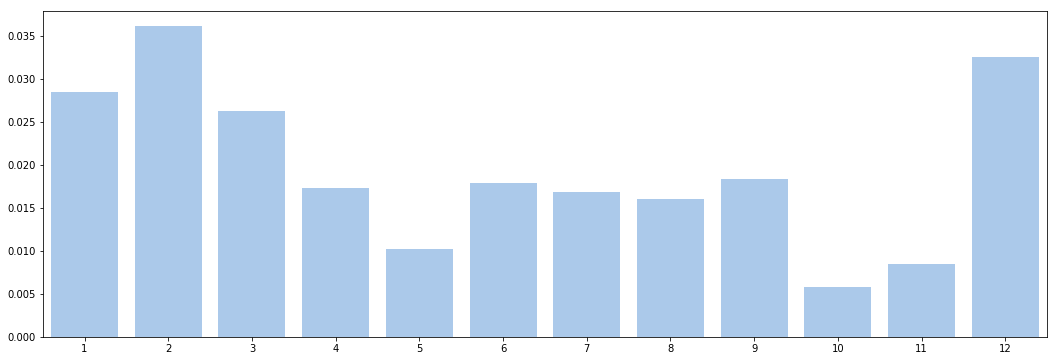

In [70]:
fig, ax = plt.subplots(figsize=(18,6))
values_cancel = dfcancel[dfcancel.cancelled].groupby('month').sum().cancelled.values
values_total = dfcancel.groupby('month').count().flightnum.values
labels = [x+1 for x in list(range(12))]
sns.set_color_codes('pastel')
sns.barplot(y=values_cancel/values_total,x=labels,ax=ax,label='Total',color='b');

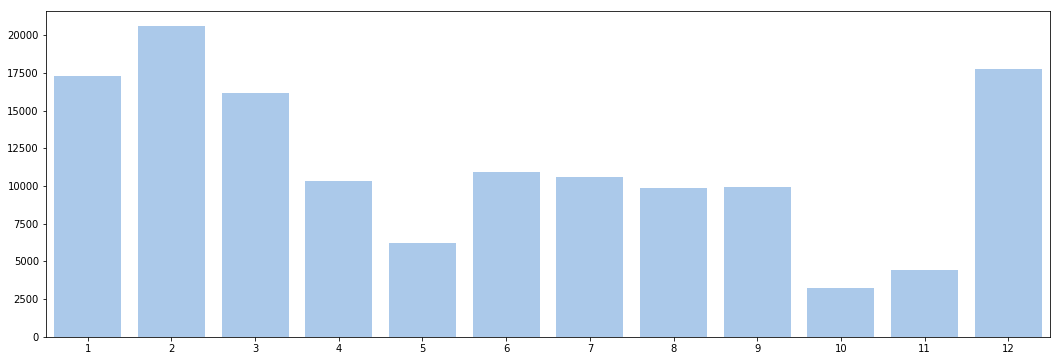

In [6]:
fig, ax = plt.subplots(figsize=(18,6))
values_cancel = dfcancel[dfcancel.cancelled].groupby('month').sum().cancelled.values
values_total = dfcancel.groupby('month').count().flightnum.values
labels = [x+1 for x in list(range(12))]
sns.set_color_codes('pastel')
sns.barplot(y=values_cancel,x=labels,ax=ax,label='Total',color='b');

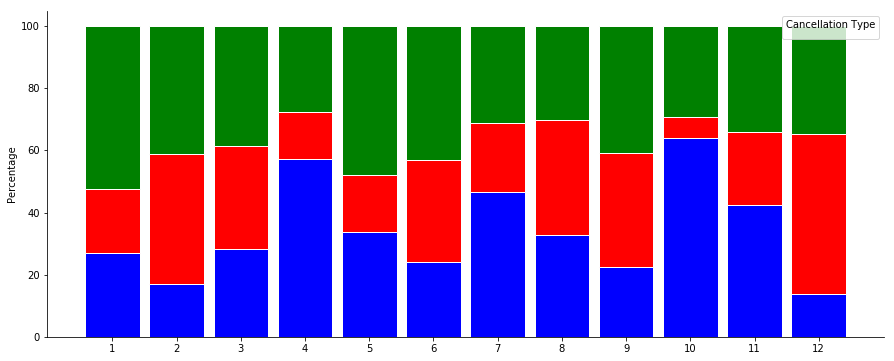

In [13]:
fig, ax = plt.subplots(figsize=(15,6))

df_temp = dfcancel[(dfcancel['origin'] == 'ORD') & (dfcancel.cancelled)]
totals  = df_temp.groupby(['month']).flightnum.count()
carrier_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[::3]
carrier_cancel = [i/j*100 for i,j in zip(carrier_cancel,totals)]
weather_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[1::3]
weather_cancel = [i/j*100 for i,j in zip(weather_cancel,totals)]
NAS_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[2::3]
NAS_cancel = [i/j*100 for i,j in zip(NAS_cancel,totals)]

barwidith = 0.85
x = list(range(1,13))
plt.xticks(x)
plt.ylabel('Percentage')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(cancel_reason, title = 'Cancellation Type', loc = 'upper right')

plt.bar(x,carrier_cancel,color='blue',edgecolor='white', width = barwidith)
plt.bar(x,weather_cancel,bottom=carrier_cancel,color='red',edgecolor='white', width = barwidith)
plt.bar(x,NAS_cancel,bottom=[i+j for i,j in zip(carrier_cancel,weather_cancel)],color='green',edgecolor='white', width = barwidith);

### Cancellations per moment of day

In [29]:
dfcancel['hourofday'] = [x.hour for x in dfcancel.crsdeptime]
bins = [0,6,12,18,24]
labels = ['night','morning','afternoon','evening']
dfcancel['daystage'] = pd.cut(dfcancel.hourofday,bins,labels=labels)

In [37]:
dftemp =pd.DataFrame(dfcancel[dfcancel.cancelled].groupby('daystage').flightnum.count() / dfcancel.groupby('daystage').flightnum.count())

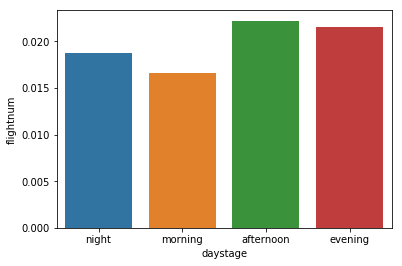

In [41]:
sns.barplot(data = dftemp, x=dftemp.index, y=dftemp.flightnum);

### Cancellations per day of week

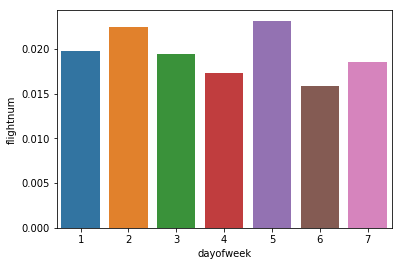

In [62]:
dftemp =pd.DataFrame(dfcancel[dfcancel.cancelled].groupby('dayofweek').flightnum.count() / dfcancel.groupby('dayofweek').flightnum.count())
sns.barplot(data = dftemp, x=dftemp.index, y=dftemp.flightnum);

## Delays

- percentage of delayed flights per carrier
- average delay per flight per carrier 
- facetgrid with histograms of the delay times per carrier 
- box plot with delay times per carrier 
- heatmap between carrier and month with delay times
- pairgrid beetween airtime,distance,delay
- heatmap between airports and months for weather delay
- scatterplots for dayofweek and hour of day

In [39]:
df.head(5)

,month,dayofmonth,dayofweek,deptime,arrtime,uniquecarrier,flightnum,airtime,arrdelay,depdelay,origin,dest,distance,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,1,3,4,20:03:00,22:11:00,WN,335,116,-14,8,IAD,TPA,810,0,0,0,0,0
1,1,3,4,07:54:00,10:02:00,WN,3231,113,2,19,IAD,TPA,810,0,0,0,0,0
2,1,3,4,06:28:00,08:04:00,WN,448,76,14,8,IND,BWI,515,0,0,0,0,0
3,1,3,4,09:26:00,10:54:00,WN,1746,78,-6,-4,IND,BWI,515,0,0,0,0,0
4,1,3,4,18:29:00,19:59:00,WN,3920,77,34,34,IND,BWI,515,2,0,0,0,32


In [77]:
dfdelay = dfdelay.drop(columns=['cancelled','cancellationcode','crsdeptime','crsarrtime'], inplace=True) 

In [79]:
dfdelay = flights_df.copy()

In [78]:
dfdelay.head(3)

AttributeError: 'NoneType' object has no attribute 'head'

### Percentage of delayed flights per carrier

In [41]:
dfdelay.groupby('uniquecarrier').flightnum.count() 

uniquecarrier
9E     34.780210
AA     80.234116
AQ      1.034620
AS     20.042711
B6     26.010214
CO     39.588142
DL     59.945749
EV     37.216474
F9     12.702215
FL     34.710704
HA      8.200822
MQ     65.087279
NW     46.113808
OH     26.211301
OO     75.230004
UA     59.625282
US     60.165672
WN    159.404961
XE     49.676350
YV     33.814830
Name: flightnum, dtype: float64

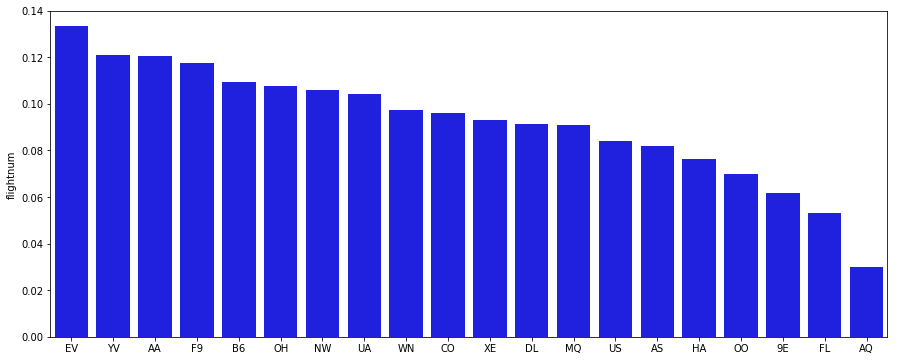

In [39]:
dftemp = pd.DataFrame(dfdelay[dfdelay.carrierdelay>0].groupby('uniquecarrier').flightnum.count() / dfdelay.groupby('uniquecarrier').flightnum.count())
dftemp.sort_values(by='flightnum',ascending = False, inplace=True)
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x = list(dftemp.index), y = dftemp.flightnum, color = 'blue', ax = ax);

### Average Delay Per Carrier 

In [51]:
dfdelay.groupby('uniquecarrier').carrierdelay.mean().reset_index().sort_values(ascending=False,by='carrierdelay')

,uniquecarrier,carrierdelay
19,YV,7.561841
7,EV,6.019670
13,OH,5.443967
1,AA,4.665196
12,NW,4.252088
15,UA,3.826680
11,MQ,3.475230
0,9E,3.464841
4,B6,3.455646
5,CO,3.337726


### Delay Distribution

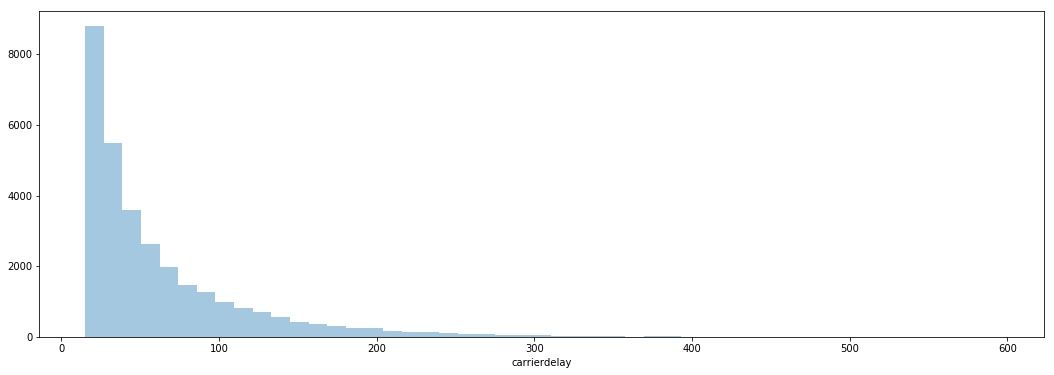

In [64]:
mindelay = dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay.min()
maxdelay = dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay.max()
steps = 50
bins = np.arange(mindelay,maxdelay,(maxdelay-mindelay)/steps)

fig, ax = plt.subplots(figsize=(18,6))
sns.distplot(dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay, kde=False, bins=bins, ax=ax);

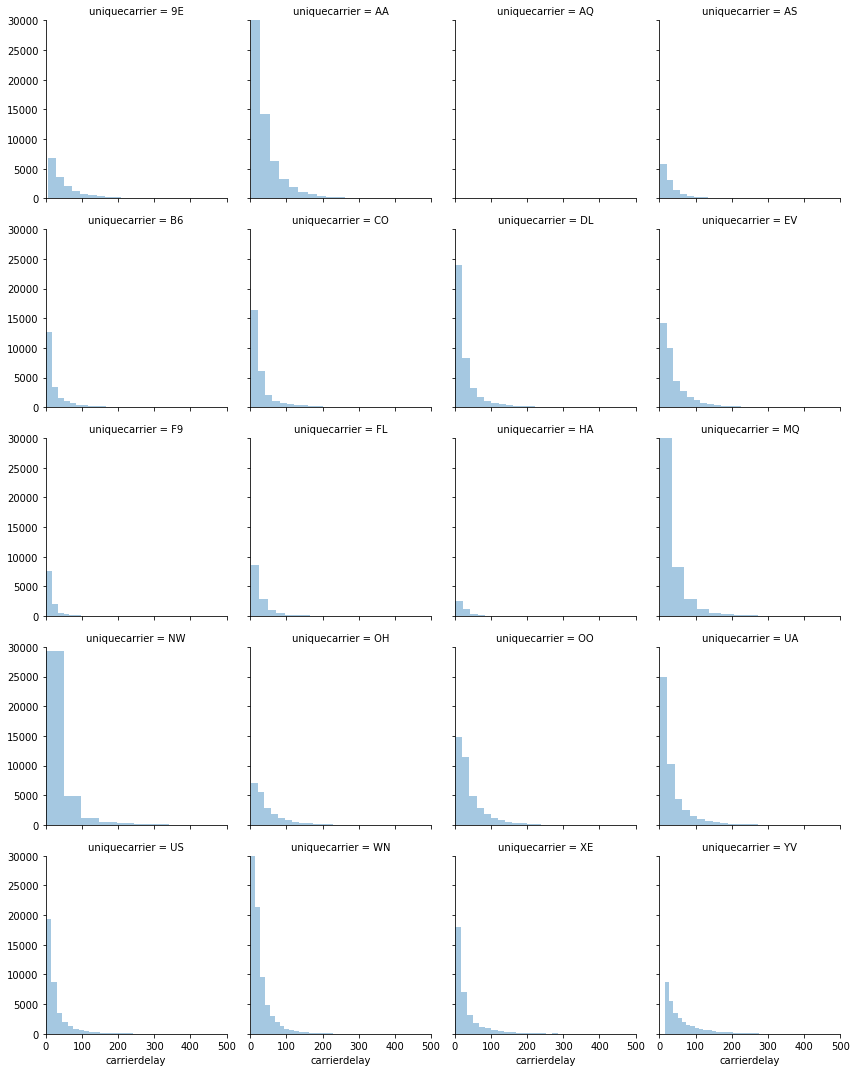

In [79]:
g = sns.FacetGrid(data = dfdelay[(dfdelay.carrierdelay!=0)], col = 'uniquecarrier', col_wrap = 4, height = 3,xlim=(0,500),ylim=(0,30000))
g.map(sns.distplot, 'carrierdelay', kde = False)

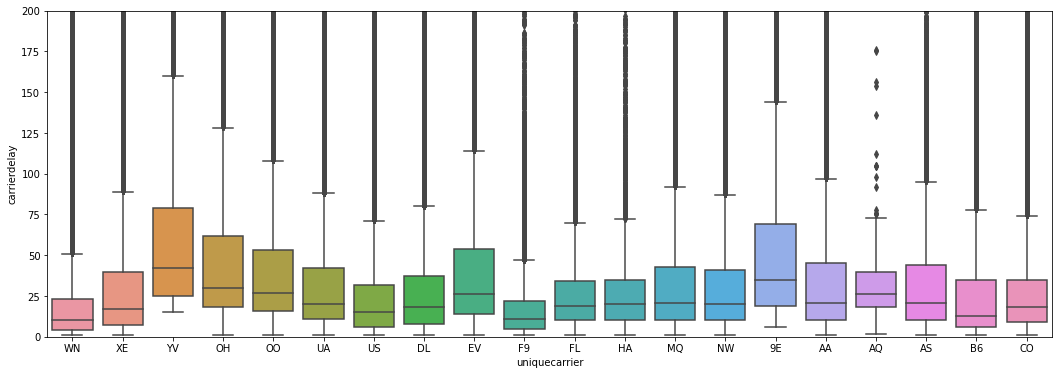

In [80]:
fig, ax = plt.subplots(figsize=(18,6))
ax.set_ylim([0,200])
sns.boxplot(data = dfdelay[(dfdelay.carrierdelay!=0)], y = 'carrierdelay', x = 'uniquecarrier', ax = ax);

### Heatmap between carrier and monthly delays

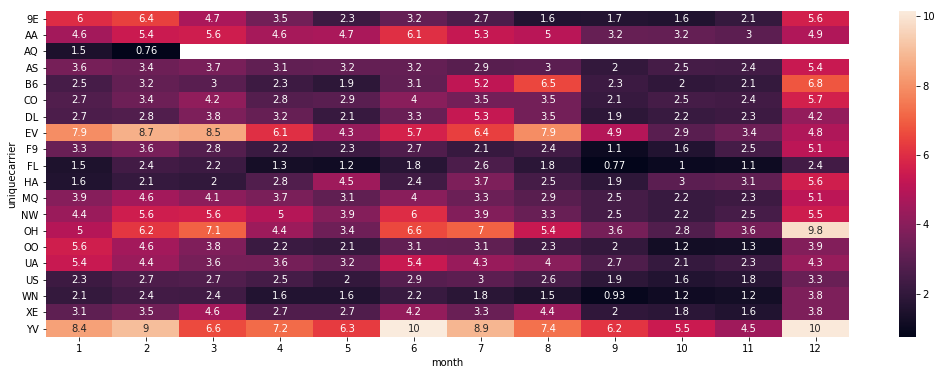

In [49]:
#Average delay per carrier/month
testdf = dfdelay.groupby(['uniquecarrier','month']).carrierdelay.mean().reset_index(name='carrierdelay')
testdf = testdf.pivot(index = 'uniquecarrier', columns = 'month', values = 'carrierdelay')
testdf

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(testdf, annot = True, ax = ax);

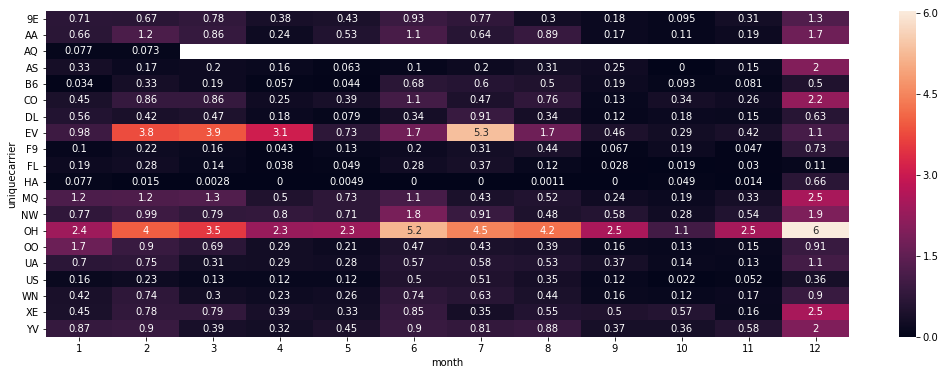

In [72]:
#Average weather delay per carrier month
testdf = dfdelay.groupby(['uniquecarrier','month']).weatherdelay.mean().reset_index(name='weatherdelay')
testdf = testdf.pivot(index = 'uniquecarrier', columns = 'month', values = 'weatherdelay')
testdf

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(testdf, annot = True, ax = ax);

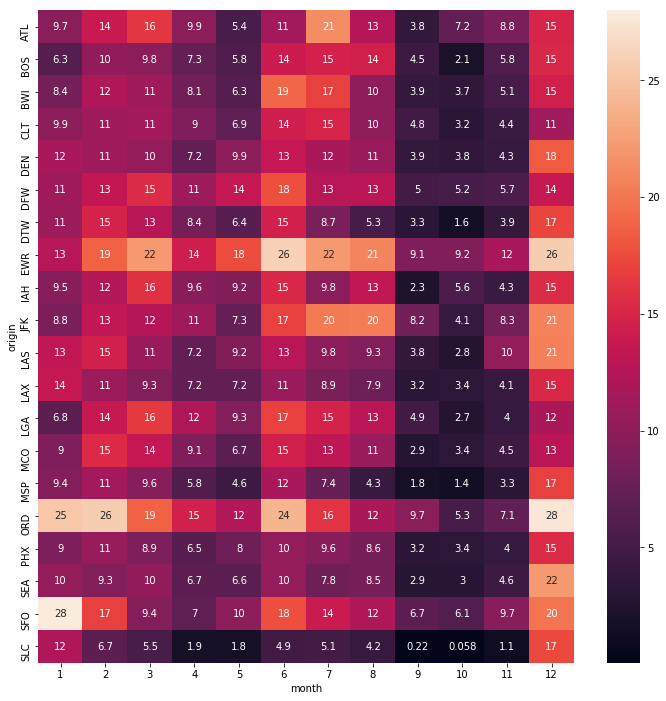

In [73]:
#Departure delay per airport/month
topairports = list(dfdelay.groupby('origin').flightnum.count().sort_values(ascending=False).head(20).index)

testdf = dfdelay[dfdelay.origin.isin(topairports)]

testdf = testdf.groupby(['origin','month']).depdelay.mean().reset_index(name='depdelay')
testdf = testdf.pivot(index = 'origin', columns = 'month', values = 'depdelay')

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(testdf, annot = True, ax = ax);

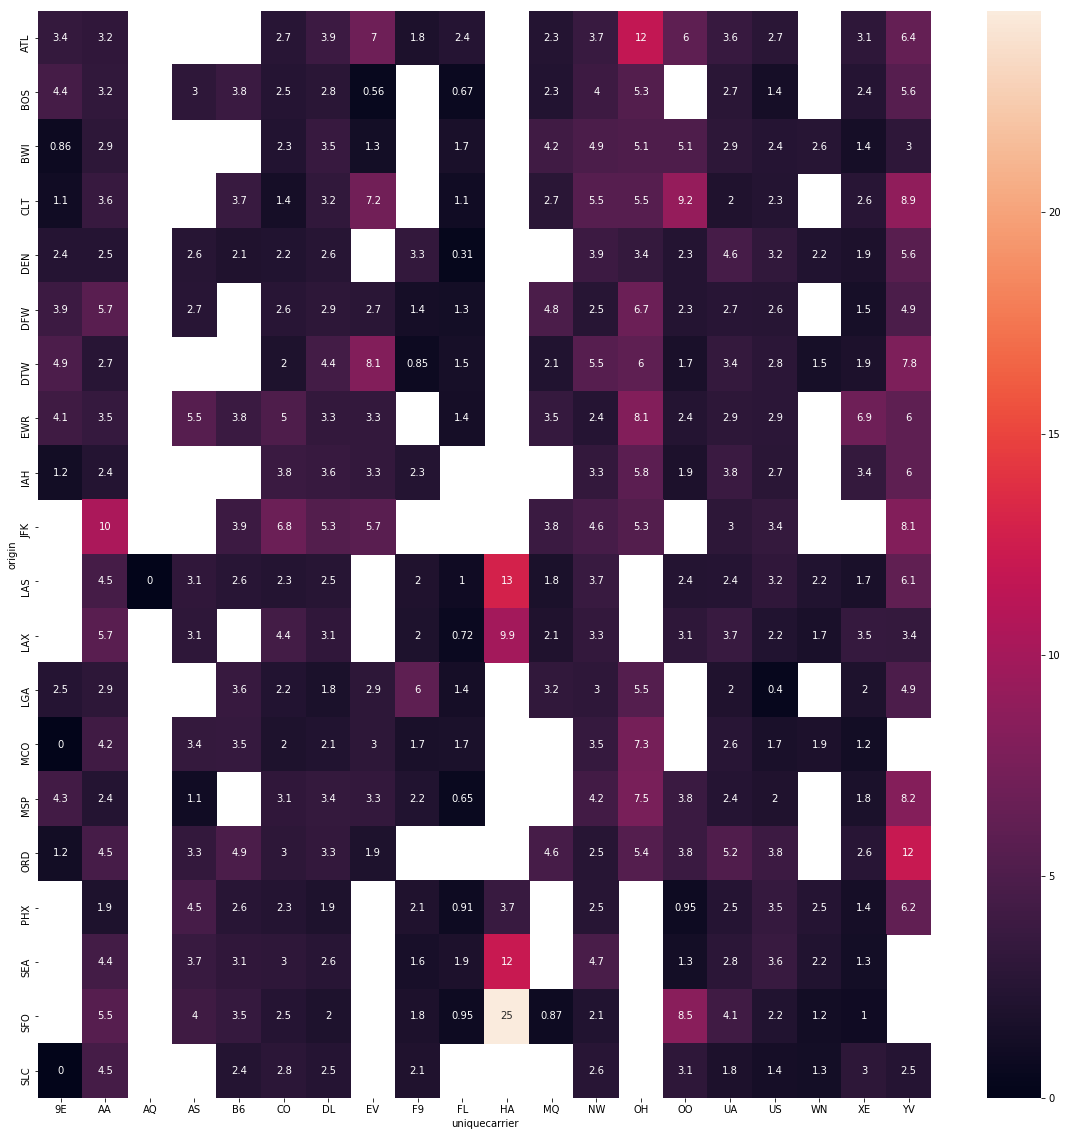

In [75]:
#Departure delay per airport/carrier
testdf = dfdelay[dfdelay.origin.isin(topairports)]

testdf = testdf.groupby(['origin','uniquecarrier']).carrierdelay.mean().reset_index(name='carrierdelay')
testdf = testdf.pivot(index = 'origin', columns = 'uniquecarrier', values = 'carrierdelay')

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(testdf, annot = True, ax = ax);

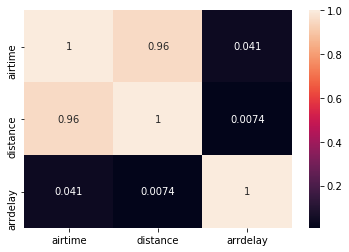

In [104]:
sns.heatmap(dfdelay[['airtime','distance','arrdelay']].corr(),annot = True);

In [84]:
dfdelay.head(3)

,month,dayofmonth,dayofweek,deptime,arrtime,uniquecarrier,flightnum,airtime,arrdelay,depdelay,origin,dest,distance,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,course
0,1,3,4,20:03:00,22:11:00,WN,335,116,-14,8,IAD,TPA,810,0,0,0,0,0,IADTPA
1,1,3,4,07:54:00,10:02:00,WN,3231,113,2,19,IAD,TPA,810,0,0,0,0,0,IADTPA
2,1,3,4,06:28:00,08:04:00,WN,448,76,14,8,IND,BWI,515,0,0,0,0,0,INDBWI


In [83]:
dfdelay['course'] = df.origin + df.dest

In [86]:
dfdelay.groupby('course').arrdelay.mean().sort_values(ascending = False)

course
CMISPI    575.000000
BHMJFK    252.000000
RICORF    227.000000
ATWDSM    210.000000
ORFBOI    180.000000
ORFBDL    175.000000
ROABWI    138.000000
ORFPBI    135.000000
IADDCA    135.000000
INDPIT    130.000000
ONTSAN    128.500000
TPAMCO    126.000000
OKCTUL    122.000000
ROACVG    114.000000
MCILNK    108.000000
CIDMKE    107.000000
ABELGA    106.888889
CHODCA    105.000000
JFKEGE    100.714286
LNKPIA    100.000000
JFKLGA    100.000000
AUSDSM    100.000000
TYSAUS     98.000000
TULOMA     92.000000
LEXCOS     91.000000
COSCLE     90.000000
HSVTUS     88.000000
BWILGA     87.857143
MCOTPA     87.000000
ICTOKC     86.500000
             ...    
CLETUL    -15.000000
SEALIH    -15.120219
SFOMSO    -15.166667
LIHSEA    -15.431694
PHLSDF    -15.500000
CRWDTW    -15.750000
MCOMDT    -15.880952
LITMCO    -16.000000
PHLEWR    -16.368421
TUSOAK    -16.830065
MCOTYS    -18.246032
OAKTUS    -18.749186
PLNDCA    -19.000000
PITSJU    -19.000000
SMFOGG    -19.627119
BOSBTV    -20.000000
SNAKOA

In [87]:
dfdelay.groupby('course').arrdelay.sum().sort_values(ascending = False)

course
ORDLGA    209318
ORDEWR    180997
LGAORD    179710
ATLLGA    171890
EWRORD    168650
LAXSFO    163913
ATLEWR    161095
EWRATL    151334
DFWORD    143287
CLTEWR    134268
LGAATL    129231
ATLORD    128699
SFOLAX    125374
BOSJFK    124054
ORDBOS    118416
ORDDFW    118148
ORDLAX    116586
ORDATL    116186
ORDPHL    113592
DTWORD    113553
MSPORD    112991
ORDMSP    109971
DENORD    106263
ATLDFW    105745
DTWEWR    105350
PHLORD    104734
BOSEWR    103197
DFWATL    101372
JFKBOS    101182
ORDDCA    101072
           ...  
SLESLC     -4452
MSYBHM     -4487
TWFSLC     -4517
LGBMRY     -4527
EVVDTW     -4605
MTJDEN     -4970
SLCCOS     -4982
SNAMSP     -5039
EUGPDX     -5056
SANATL     -5068
PHXMDW     -5084
TUSOAK     -5150
RDUFLL     -5156
MBSDTW     -5224
SEALIH     -5534
HLNSLC     -5573
MSOSLC     -5601
LIHSEA     -5648
OAKTUS     -5756
PBICLT     -5779
CODSLC     -6501
PHLSTL     -7543
SUNSLC     -7841
SGUSLC     -8313
GTFSLC     -8837
SLCCPR     -9315
CPRSLC     -9950
JAXCLT 

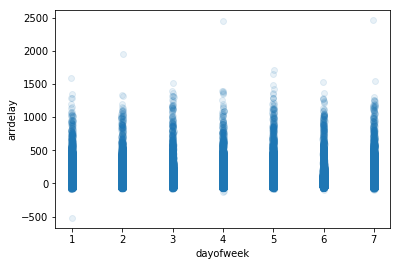

In [81]:
sns.regplot(data = dfdelay, x = 'dayofweek', y = 'arrdelay', fit_reg=False, x_jitter = 0.02, y_jitter = 0.02, scatter_kws = {'alpha' : 1/10});

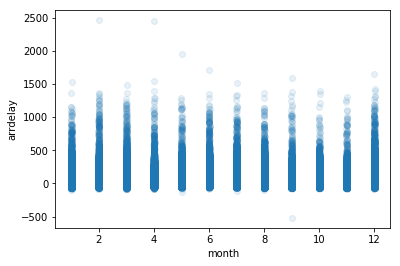

In [82]:
sns.regplot(data = dfdelay, x = 'month', y = 'arrdelay', fit_reg=False, x_jitter = 0.02, y_jitter = 0.02, scatter_kws = {'alpha' : 1/10});

## Explanatory Analysis

Barchart with cancellations per airline and per reason

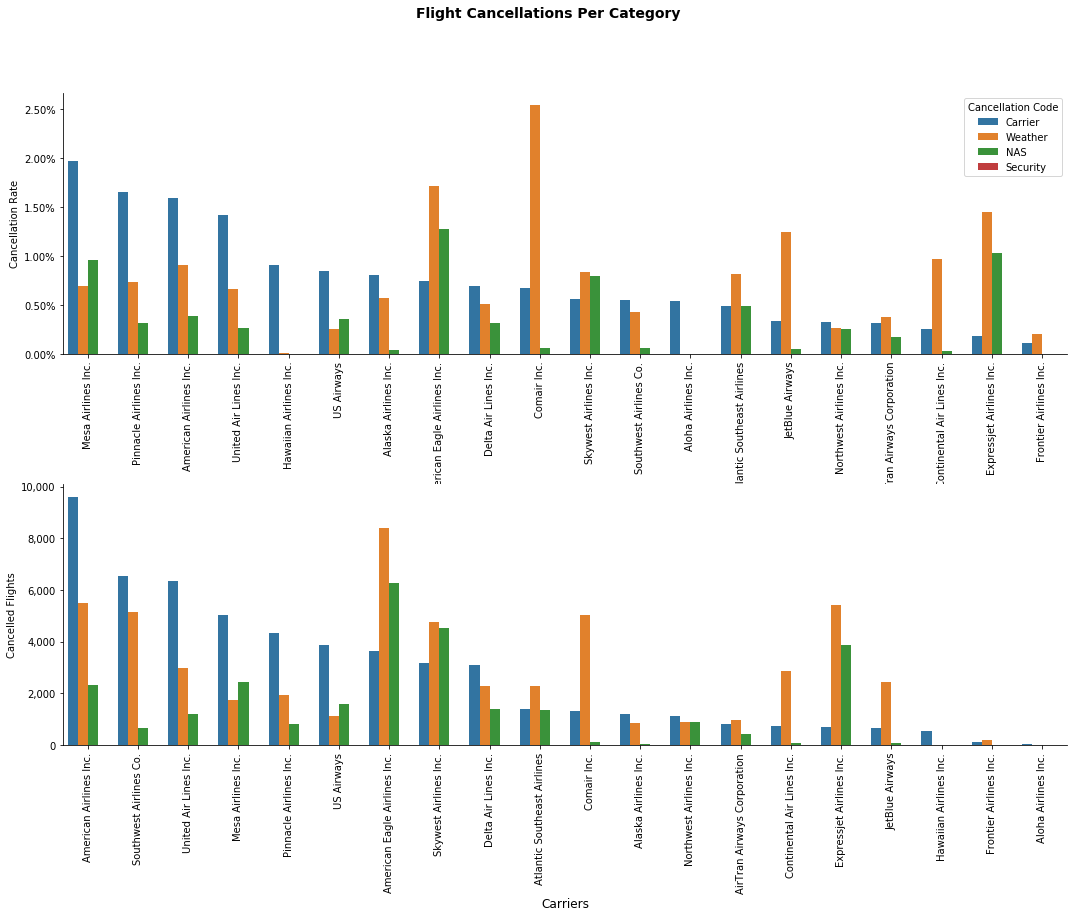

In [133]:
#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, (ax1,ax2) = plt.subplots(2,figsize=(18,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Flight Cancellations Per Category',va='top',fontweight='bold',fontsize='14')

#Chart 1 
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values
x_labels = []
for carrier in carrier_order: 
    x_labels.append(carrier_dict[carrier])

sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelrate', hue = 'cancellationcode', order = carrier_order, ax = ax1)
ax1.set_ylabel('Cancellation Rate')
ax1.set_xlabel('')
ax1.set_xticklabels(x_labels,rotation=90)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{0:.2f}%".format(x)))
sns.despine(fig,ax=ax1)

#Chart 2 
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelled.sum().sort_values(ascending=False).index.values
x_labels = []
for carrier in carrier_order: 
    x_labels.append(carrier_dict[carrier])
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelled', hue = 'cancellationcode', order = carrier_order, ax = ax2)
ax2.set_xlabel('Carriers', fontsize='12')
ax2.set_ylabel('Cancelled Flights')
ax2.set_xticklabels(x_labels,rotation=90)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Legend
h, l = ax1.get_legend_handles_labels()
ax1.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right');
ax2.get_legend().remove()

Airports with highest rate of cancellations

Cancellation per year period and reason 

In [21]:
np.arange(0,125,25)

array([  0,  25,  50,  75, 100])

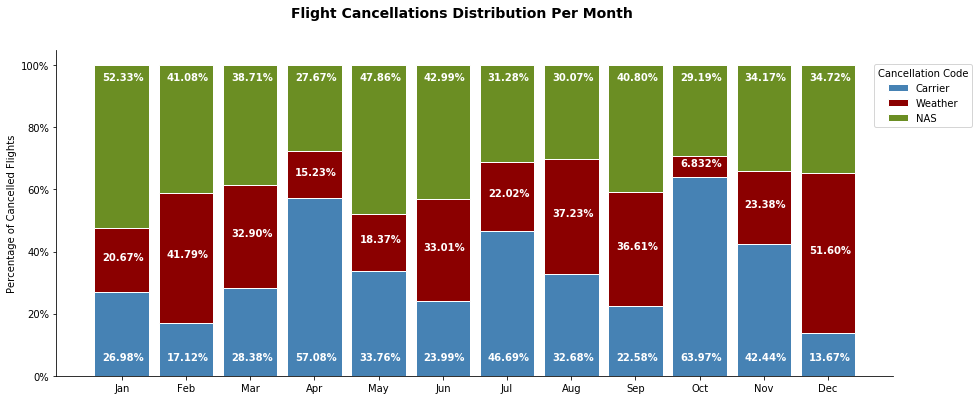

In [67]:
fig, ax = plt.subplots(figsize=(15,6))
fig.suptitle('Flight Cancellations Distribution Per Month',va='top',fontweight='bold',fontsize='14')

df_temp = dfcancel[(dfcancel['origin'] == 'ORD') & (dfcancel.cancelled)]
totals  = df_temp.groupby(['month']).flightnum.count()
carrier_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[::3]
carrier_cancel = [i/j*100 for i,j in zip(carrier_cancel,totals)]
weather_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[1::3]
weather_cancel = [i/j*100 for i,j in zip(weather_cancel,totals)]
NAS_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[2::3]
NAS_cancel = [i/j*100 for i,j in zip(NAS_cancel,totals)]

barwidith = 0.85
x = list(range(1,13))
x_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(x_labels)
plt.xticks(x)
plt.ylabel('Percentage of Cancelled Flights')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(cancel_reason, title = 'Cancellation Type', loc = 'upper right')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{0:.0f}%".format(x)))

plt.bar(x,carrier_cancel,color='steelblue',edgecolor='white', width = barwidith)
for i,v in enumerate(carrier_cancel):
        ax.text(i+0.70, 5, str(v)[:5]+'%', color='white',fontweight='bold')
plt.bar(x,weather_cancel,bottom=carrier_cancel,color='darkred',edgecolor='white', width = barwidith)
for i,v in enumerate(weather_cancel):
        ax.text(i+0.70, carrier_cancel[i]+v/2, str(v)[:5]+'%', color='white',fontweight='bold')
plt.bar(x,NAS_cancel,bottom=[i+j for i,j in zip(carrier_cancel,weather_cancel)],color='olivedrab',edgecolor='white', width = barwidith)
for i,v in enumerate(NAS_cancel):
        ax.text(i+0.70, 95, str(v)[:5]+'%', color='white',fontweight='bold')

ax.legend(cancel_reason, title = 'Cancellation Code',bbox_to_anchor=(1.1, 0.97));

Delay percentage and delay average

Boxplot without outliers

In [156]:
dfdelay[dfdelay.carrierdelay != 0].groupby('uniquecarrier').carrierdelay.median().sort_values(ascending=False)

uniquecarrier
YV    42.0
9E    35.0
OH    30.0
OO    27.0
EV    26.0
AQ    26.0
AA    21.0
MQ    21.0
AS    21.0
UA    20.0
NW    20.0
HA    20.0
FL    19.0
DL    18.0
CO    18.0
XE    17.0
US    15.0
B6    13.0
F9    11.0
WN    10.0
Name: carrierdelay, dtype: float64

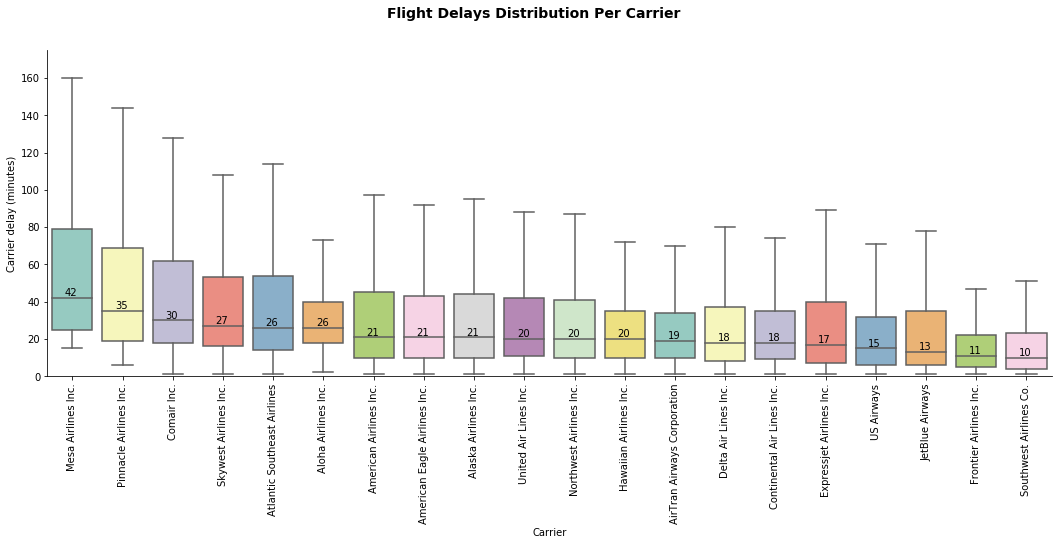

In [158]:
carrier_order = dfdelay[dfdelay.carrierdelay != 0].groupby('uniquecarrier').carrierdelay.median().sort_values(ascending=False).index.tolist()
medians = dfdelay[dfdelay.carrierdelay != 0].groupby('uniquecarrier').carrierdelay.median().reindex(carrier_order).values
fig, ax = plt.subplots(figsize=(18,6))
fig.suptitle('Flight Delays Distribution Per Carrier',va='top',fontweight='bold',fontsize='14')
ax.set_ylim([0,175])
sns.boxplot(data = dfdelay[(dfdelay.carrierdelay!=0)], y = 'carrierdelay', x = 'uniquecarrier', ax = ax,showfliers=False,order=carrier_order,palette='Set3')
ax.set(ylabel='Carrier delay (minutes)')
ax.set(xlabel='Carrier')
x_labels=[]
for carrier in carrier_order: 
    x_labels.append(carrier_dict[carrier])
ax.set_xticklabels(x_labels,rotation=90)
ax.spines['top'].set_visible(False)
for i,v in enumerate(medians):
        ax.text(i-0.15, v+1, str(v)[:2], color='black')
ax.spines['right'].set_visible(False);

Heatmap with carrier and month

Heatmap with airpoirt nad month

Route with highest delay (barchart)